## Importing the relevant packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [4]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [5]:
df_comp['market_value']=df_comp.ftse

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [7]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_7666/3293167152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1)*100


## ACF for Returns

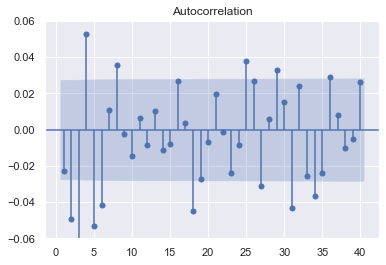

In [12]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df['returns'][1:],lags=40,zero=False)
plt.ylim(-0.06,0.06)
plt.show()

## MA(1) for Returns

In [14]:
from statsmodels.tsa.arima.model import ARIMA
ma1_ret_model=ARIMA(df['returns'][1:],order=(0,0,1))
ma1_ret_res=ma1_ret_model.fit()
ma1_ret_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Fri, 15 Jul 2022   AIC                          15865.190
Time:                        13:06:01   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag MA Models for Returns

In [16]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [18]:
ma2_ret_model=ARIMA(df['returns'][1:],order=(0,0,2))
ma2_ret_res=ma2_ret_model.fit()
print(ma2_ret_res.summary())
print("LLR Test",LLR_test(ma1_ret_model,ma2_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Fri, 15 Jul 2022   AIC                          15853.728
Time:                        13:32:49   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [19]:
ma3_ret_model=ARIMA(df['returns'][1:],order=(0,0,3))
ma3_ret_res=ma3_ret_model.fit()
print(ma3_ret_res.summary())
print("LLR Test",LLR_test(ma2_ret_model,ma3_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Fri, 15 Jul 2022   AIC                          15818.634
Time:                        13:33:21   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [20]:
ma4_ret_model=ARIMA(df['returns'][1:],order=(0,0,4))
ma4_ret_res=ma4_ret_model.fit()
print(ma4_ret_res.summary())
print("LLR Test",LLR_test(ma3_ret_model,ma4_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Fri, 15 Jul 2022   AIC                          15809.547
Time:                        14:36:26   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [21]:
ma5_ret_model=ARIMA(df['returns'][1:],order=(0,0,5))
ma5_ret_res=ma5_ret_model.fit()
print(ma5_ret_res.summary())
print("LLR Test",LLR_test(ma4_ret_model,ma5_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Fri, 15 Jul 2022   AIC                          15799.645
Time:                        14:36:50   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [22]:
ma6_ret_model=ARIMA(df['returns'][1:],order=(0,0,6))
ma6_ret_res=ma6_ret_model.fit()
print(ma6_ret_res.summary())
print("LLR Test",LLR_test(ma5_ret_model,ma6_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Fri, 15 Jul 2022   AIC                          15794.442
Time:                        14:37:36   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [23]:
ma7_ret_model=ARIMA(df['returns'][1:],order=(0,0,7))
ma7_ret_res=ma7_ret_model.fit()
print(ma7_ret_res.summary())
print("LLR Test",LLR_test(ma6_ret_model,ma7_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Fri, 15 Jul 2022   AIC                          15796.091
Time:                        14:38:05   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [ ]:
# Thus we can conclude that MA 6 model works well

In [25]:
# In ACF method we see that 7th lag is not significant but the 8th lag was significant so we will test MA 8

In [26]:
ma8_ret_model=ARIMA(df['returns'][1:],order=(0,0,8))
ma8_ret_res=ma8_ret_model.fit()
print(ma8_ret_res.summary())
print("LLR Test",LLR_test(ma7_ret_model,ma8_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Fri, 15 Jul 2022   AIC                          15791.205
Time:                        14:40:47   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [28]:
LLR_test(ma6_ret_model,ma8_ret_model,DF=2)

#Therefore ma 8 works better than ma6 even though ma 8 has a one non significant coefficient too.

0.027

## Residuals for Returns

In [31]:
df['ma8_ret_resid']=ma8_ret_model.fit().resid

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_7666/2002994206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma8_ret_resid']=ma8_ret_model.fit().resid


In [32]:
print(df['ma8_ret_resid'].mean())
print(df['ma8_ret_resid'].var())

-5.160537591881917e-05
1.3552546724934174


In [ ]:
# So we observe that the mean is close to zero and var is around 1.355

In [33]:
print(sqrt(df['ma8_ret_resid'].var()))

1.1641540587454124


In [ ]:
# Gaussian white noise implies normality and thus we can use 68-95-99.5 rule
# this can be used to analyse the spread of residuals. 
# 3*1.16= 99.5% values lie within [-3.48,3.48] range.
# This means in worst case senario, we can be 7% point off when predicting result of market value
# and this percentage is too much when predicting profit and loss.

<AxesSubplot:xlabel='date'>

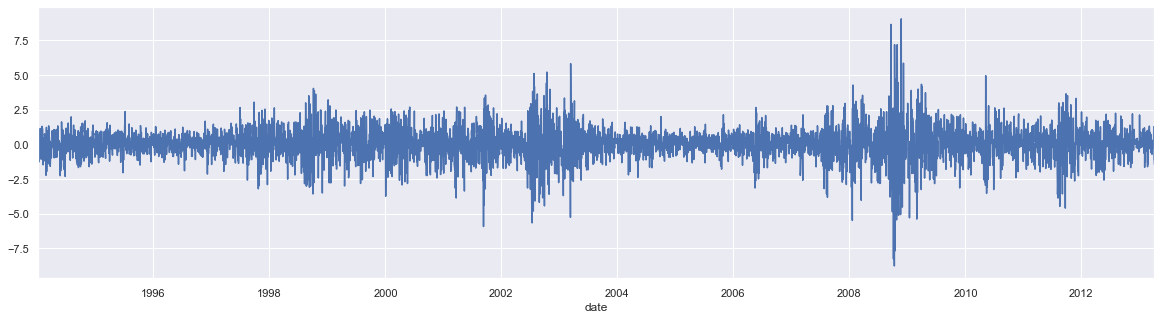

In [37]:
df['ma8_ret_resid'].plot(figsize=[20,5])

In [38]:
# If we exclude dot com and housing price issue in 1990s and 2008 and the crisis following them then the residuals
# are rather random and they are confined within a reasonable range. We can check for stationarity to check for 
# white noise. thus we run adjusted DF test to check for stationarity.

In [41]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df['ma8_ret_resid'][1:])

(-70.83777222244727,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.881935682468)

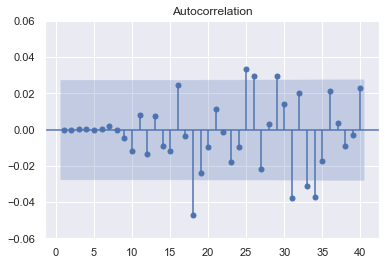

In [42]:
# We will also do the ACF of the data
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df['ma8_ret_resid'][1:],lags=40,zero=False)
plt.ylim(-0.06,0.06)
plt.show()

In [ ]:
# So we see the first 17 lags are significantly zero and does not have any importance. 
# The 18th lag has some significance but that value is too old to create impact and market adjusts to shocks and
# thus is not relevant in present data.

## Normalized Returns

In [43]:
# Using normalized data is crucial in comparing different time series

In [45]:
benchmark=df['returns'].iloc[1]
df['norm_returns']=df['returns'].div(benchmark).mul(100)

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_7666/2824630290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_returns']=df['returns'].div(benchmark).mul(100)


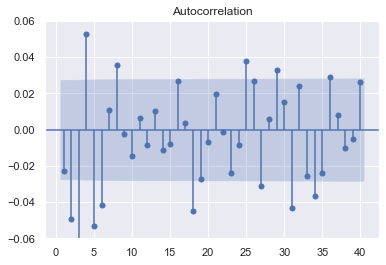

In [46]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df['norm_returns'][1:],lags=40,zero=False)
plt.ylim(-0.06,0.06)
plt.show()

In [47]:
# It is giving similar results with not normalized data. but still we will try to fit ma6 and ma8 

In [49]:
norm_ma6_ret_model=ARIMA(df['returns'][1:],order=(0,0,6))
norm_ma6_ret_res=norm_ma6_ret_model.fit()
print(norm_ma6_ret_res.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Fri, 15 Jul 2022   AIC                          15794.442
Time:                        15:29:40   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [53]:
norm_ma7_ret_model=ARIMA(df['returns'][1:],order=(0,0,7))
norm_ma7_ret_res=norm_ma7_ret_model.fit()
print(norm_ma7_ret_res.summary())
print("LLR Test",LLR_test(norm_ma6_ret_model,norm_ma7_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Fri, 15 Jul 2022   AIC                          15796.091
Time:                        15:31:09   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [52]:
norm_ma8_ret_model=ARIMA(df['returns'][1:],order=(0,0,8))
norm_ma8_ret_res=norm_ma8_ret_model.fit()
print(norm_ma8_ret_res.summary())
print("LLR Test",LLR_test(norm_ma7_ret_model,norm_ma8_ret_model))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Fri, 15 Jul 2022   AIC                          15791.205
Time:                        15:30:50   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [ ]:
# This concludes that the normalized returns have similar result to not normalized data when it comes to MA model

# https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary

## MA Models For Prices

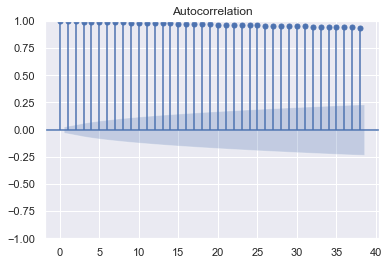

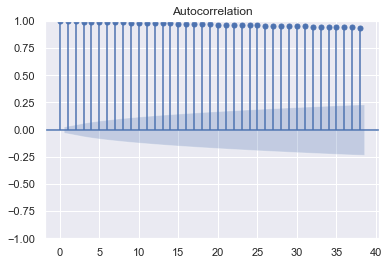

In [54]:
sgt.plot_acf(df['market_value'])

In [55]:
# This shows that the all the 40 lags are significant this suggests any higher lag model will be better than
# lower lag and we might have to use ma infinity model. But since no such thing exists we can try to use MA models
# to see the impact

In [56]:
ma1_price_model=ARIMA(df['market_value'],order=(0,0,1))
ma1_price_res=ma1_price_model.fit()
print(ma1_price_res.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38629.000
Date:                Fri, 15 Jul 2022   AIC                          77264.000
Time:                        23:28:46   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6317     15.834    321.441      0.000    5058.598    5120.665
ma.L1          0.9573      0.004    231.410      0.000       0.949       0.965
sigma2      2.817e+05   8160.538     34.519      0.0

In [ ]:
# NOTE : MA model does not perform well when it comes to non-stationary data
# MA(1) model with coefficient close to 1 is approximately equal to AR(n) model with error term from n periods back